In [4]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 14.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


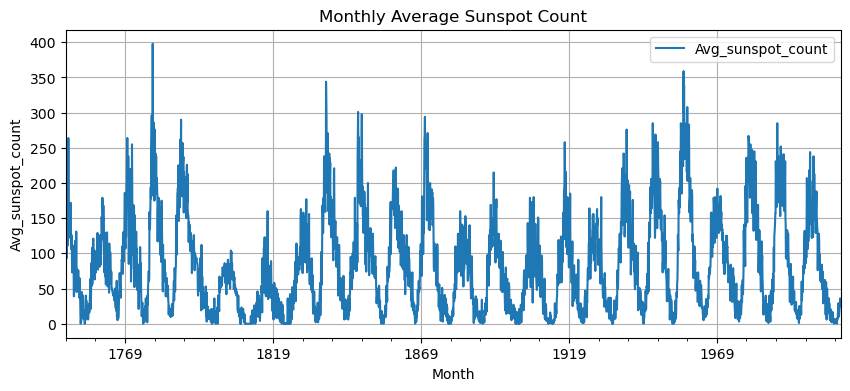

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=23470.937, Time=12.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=28278.108, Time=0.21 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=23809.564, Time=3.58 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=25617.418, Time=3.63 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=30519.014, Time=0.13 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=23470.278, Time=8.51 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=23473.634, Time=2.68 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=23469.847, Time=23.41 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=23466.807, Time=33.71 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=35.76 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=23466.355, Time=29.05 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=23469.823, Time=27.20 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=23470.638, Time=8.41 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=23464.673, Time=24.77 sec
 ARI

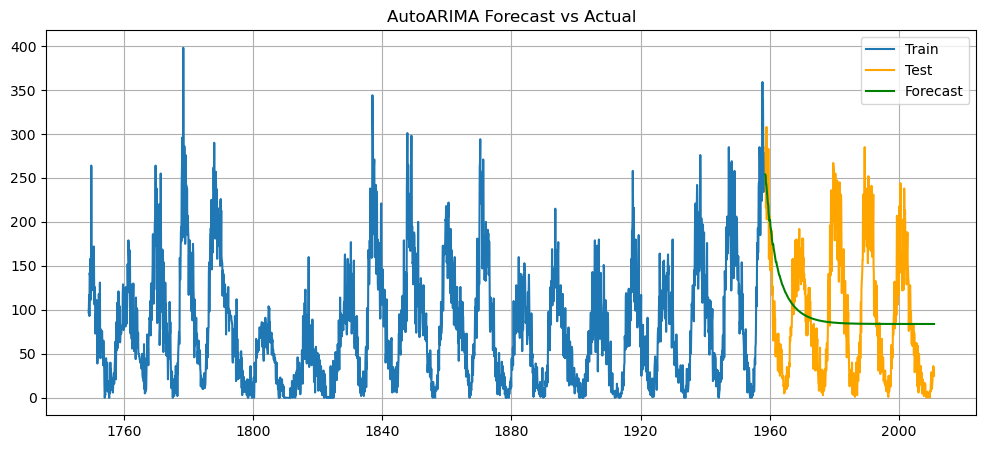

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from pmdarima import auto_arima

# Step 1: Load the dataset
df = pd.read_csv("train.csv")

# Step 2: Parse 'Month' column as datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Optional: Ensure monthly frequency (MS = Month Start)
df = df.asfreq('MS')

# Step 3: Visualize the data
df.plot(title='Monthly Average Sunspot Count', figsize=(10, 4))
plt.ylabel("Avg_sunspot_count")
plt.grid()
plt.show()

# Step 4: Train-Test Split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Step 5: AutoARIMA Model
model = auto_arima(train,
                   seasonal=True,
                   m=12,  # Monthly seasonality
                   stepwise=True,
                   suppress_warnings=True,
                   trace=True)

# Step 6: Forecast
n_periods = len(test)
forecast = model.predict(n_periods=n_periods)
forecast = pd.Series(forecast, index=test.index)

# Step 7: Evaluate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"✅ RMSE: {rmse:.2f}")

# Step 8: Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.legend()
plt.title("AutoARIMA Forecast vs Actual")
plt.grid()
plt.show()
